In [31]:
%load_ext autoreload
%autoreload
%matplotlib inline
import rasterio
import sys
import numpy as np
sys.path.insert(0, "..")
from src.models.utils_pixpeak import get_satellite_subset
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
def build_subset(fname_orig, fname_save, r_start, r_end, c_start, c_end):
    # get file
    sat_data = rasterio.open(fname_orig)
    # get data
    band_data = get_satellite_subset(sat_data,
                                 r_start, 
                                 r_end,
                                 c_start,
                                 c_end,
                                 norm=None)
    # save data
    width = band_data.shape[1]
    height = band_data.shape[0]
    count = band_data.shape[2]
    with rasterio.open(fname_save, 'w', driver='GTiff',
                       width=width, height=height, count=count,
                       dtype=band_data.dtype, transform=sat_data.transform,
                       crs=sat_data.crs) as dst:
        for band in range(count):
            dst.write(band_data[:, :, band], indexes=band+1)
            
def test_subset(fname):
    # get file
    sat_data = rasterio.open(fname)
    if sat_data.width < 1000:
        band_data = get_satellite_subset(sat_data,
                                         0, sat_data.height,
                                         0, sat_data.width,
                                         norm=255)
        plt.imshow(band_data[:, :, 0:3].astype(int))
    else:
        print('Not plotting, too big!')    

In [33]:
# set params
fname_orig = '../data/raw/athens/athens_satellite.tif'
fname_save = '../data/raw/example_sat_data.tif'
# select subset for plotting
r_start = sat_data.height // 2
c_start = sat_data.width // 2
delta = 800
r_end = r_start + delta
c_end = c_start + delta

In [34]:
# save it
build_subset(fname_orig, fname_save, r_start, r_end, c_start, c_end)

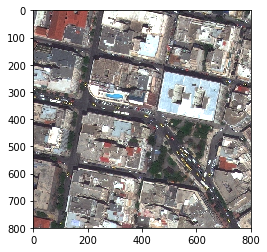

In [35]:
# save it
test_subset(fname_save)